## Desafio - Módulo 3 - Machine Learning
##### **Com respotas do questionário**

## Objetivo:
* Análise exploratória dos dados (EDA - Exploratory Data Analysis).
* Preparação dos dados.
* Comparação e ajuste de modelos de classificação.


Dataset: http://yann.lecun.com/exdb/mnist/ </br>
Imagens: https://web.archive.org/web/20180628145339/http://blog.welcomege.com/mnist-database/

**The MNIST Database**<br>
Description

MNIST database, (modified national institute of standards of technology database) is a collection of handwritten 0-9 digit images. It contains training, test and validation dataset, and is a commonly used dataset to train and validate varied image processing and machine learning algorithms.

In the previous post of logistic regression, neural network and TensorFlow introduction, I used a simple {y | x1, x2} dataset. Before my convolution neural network post, I will first introduce the MNIST database.

The database contains 55,000 images in training, 10,000 in test, and 5,000 in validation:

Attribute Information:



## Análise exploratória dos dados (EDA - Exploratory Data Analysis)

In [64]:
# importando as bibliotecas

import warnings
warnings.filterwarnings("ignore")

import sys
import input_data
import numpy as np
import matplotlib.pyplot as plt

In [65]:
!git clone https://github.com/tensorflow/tensorflow.git
sys.path.append('/content/tensorflow/tensorflow/examples/tutorials/mnist')
data = input_data.read_data_sets("MNIST_data/", one_hot=True)

fatal: destination path 'tensorflow' already exists and is not an empty directory.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [66]:
data = input_data.read_data_sets("../MNIST_data/", one_hot=True)
# check the input data size based on labels
# three data objects: training, test and validation
print("Training size: {}".format(len(data.train.labels)))
print("Test size: {}".format(len(data.test.labels)))
print("Validation size: {}".format(len(data.validation.labels)))

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
Training size: 55000
Test size: 10000
Validation size: 5000


In [67]:
# Each data object contains “images”, and “labels”. The label shows the true digit of the image.

# inside each training/test/validation
# it contains one-hot array for image vector, and labels
print(dir(data.train))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_epochs_completed', '_images', '_index_in_epoch', '_labels', '_num_examples', 'epochs_completed', 'images', 'labels', 'next_batch', 'num_examples']


In [68]:
# I imported the data as one-hot, and the 2D 28*28 pixels image has been flatten into one vector with length 784.

print(data.train.labels[0:5])
print(data.train.images[0:5])
print(np.shape(data.train.images[0:5]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5, 784)


In [69]:
# As shown above, the label is a 1-D vector for each image, with the index of maximum value as the true digit. 
# We can further get true label using argmax function:

# change labels from 2D array to a vector
data.train.trues = np.array([label.argmax() for label in data.train.labels])
print(data.train.trues[0:5])

[7 3 4 6 1]


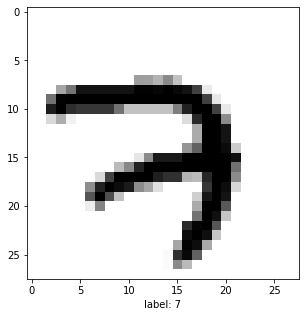

In [70]:
# Plot the first digit image:

import matplotlib
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0) 
# test print one image
index1 = 0
# image size is 28*28 pixels
img_size = 28
img_shape = (img_size, img_size)

plt.imshow(data.train.images[index1].reshape(img_shape), cmap="binary")
plt.xlabel("label: {}".format(data.train.trues[index1]))
plt.show()

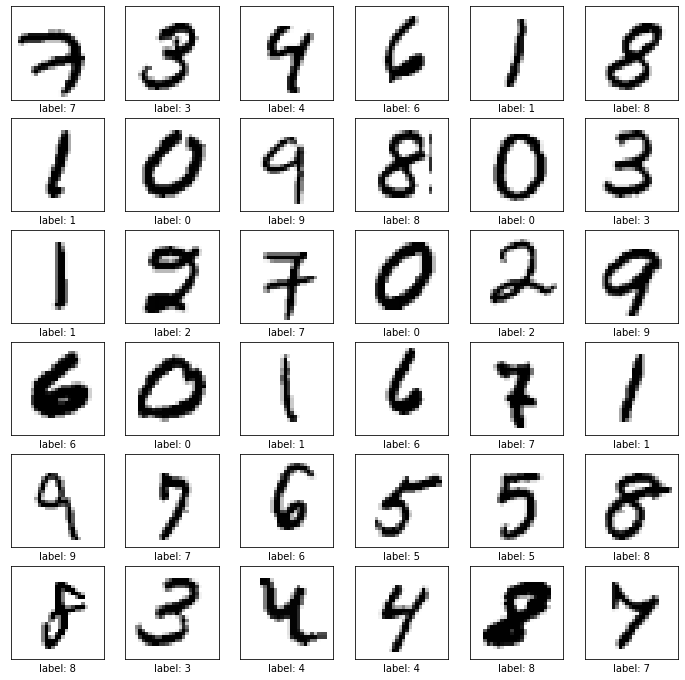

In [71]:
# Print the first 36 images:

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0) 

grid_size=6

fig, axes = plt.subplots(grid_size, grid_size)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i, ax in enumerate(axes.flat):
    ax.imshow(data.train.images[i].reshape(img_shape), cmap='binary')
    ax.set_xlabel("label: {}".format(data.train.trues[i]))
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

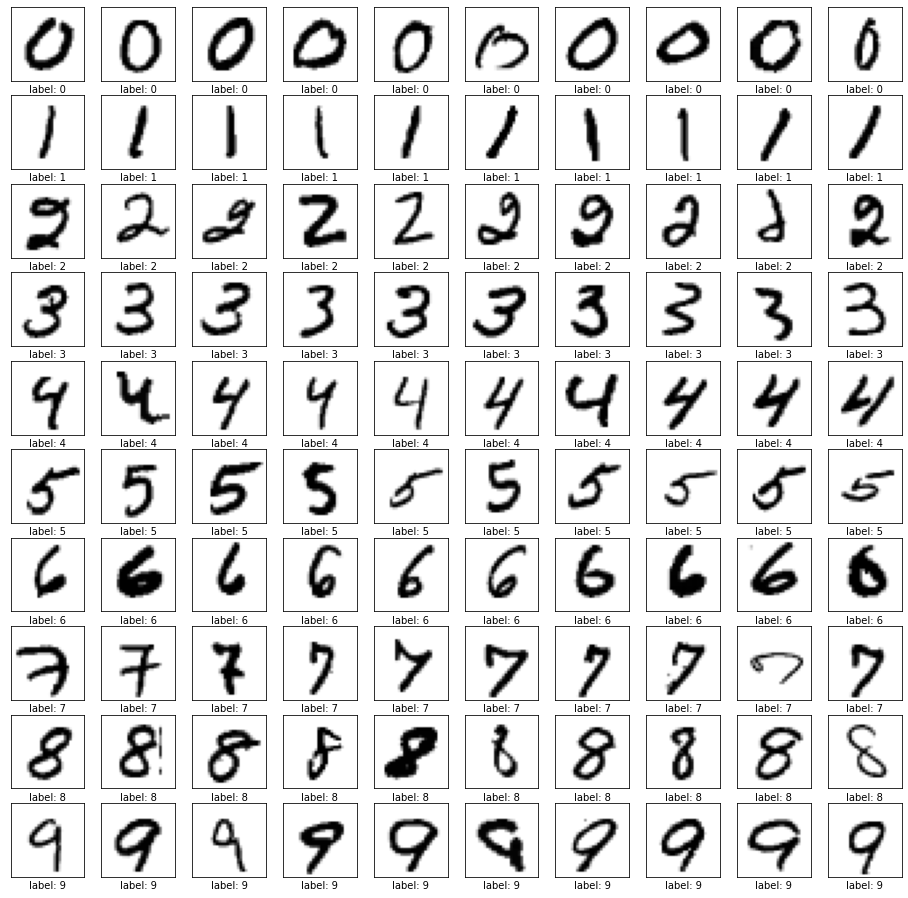

In [72]:
# Print the first 10 images for each digit:

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0, 16.0) 
grid_size=10

fig, ax = plt.subplots(grid_size, grid_size)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# print 10 examples for each 0-9 case
for i in np.arange(grid_size):
    # find the value i in the first 500 images
    item_index = np.where(data.train.trues[0:500]==i)
    item_index = item_index[0]
    for j in np.arange(grid_size):
        im_index = item_index[j]
        ax[i, j].imshow(data.train.images[im_index].reshape(img_shape), cmap='binary')
        ax[i, j].set_xlabel("label: {}".format(data.train.trues[im_index]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
    
plt.show()

#### Pergunta 1
Qual(is) métrica(s) de qualidade você considera a(s) mais importante(s) para medir o desempenho do seu algoritmo de classificação?

- Somente Acurácia.

- Precisão ou F-Score.

- Perda de Hamming.

- Perda 0-1.

#### Pergunta 2
Suponha que seu contratante lhe deu 5000 exemplos de números que seu programa terá que classificar. Os exemplos, no entanto, não foram classificados previamente. Que tipo de algoritmo você usaria para gerar um modelo para essa base de dados?

- Agrupamento

- Classificação multi label

- Regressão

- Classificação single label

#### Pergunta 3
Suponha que você gerou uma curva de validação para testar o desempenho do seu algoritmo. Na curva, você comparou o desempenho do seu modelo com o desempenho do algoritmo na validação cruzada. O resultado exibiu a sua curva acima da curva da validação cruzada, ou seja, com desempenho bem melhor, e as curvas não convergiram. O que isso significa?

- Baixa variância

- Overfitting

- O modelo está bom para ir para produção

- Underfitting

#### Pergunta 4
Para este tipo de problema, seu contratante te diz, é preferível que o algoritmo “erre sempre da mesma maneira” do que ele “erre de maneira errática”. Isso se dá porque, na etapa de conferência manual dos resultados incorretos, erros “previsíveis” são corrigidos  de forma mais barata. Que característica seria desejável seu algoritmo ter para que ele tivesse esse tipo de comportamento?

- Baixa tendência e baixa variância

- Baixa tendência e alta variância

- Alta tendência e alta variância

- Alta tendência e baixa variância

#### Pergunta 5
Suponha que, após um ano com o seu algoritmo em execução, você perceba que os valores dos cheques tendem a ter magnitudes diferentes em diferentes épocas do ano. No final do ano, por exemplo, o normal é a maior parte dos cheques ter seis ou oito dígitos, considerando os centavos, enquanto no meio do ano a quantidade de dígitos é um tanto menor. Se você souber dessa tendência com antecedência, sua empresa poderá ajustar a etapa de conferência manual de dígitos errados, gerando economia de custos.

Assim, você coleta dados de “quantidade média de dígitos nos valores dos cheques” por “mês/ano”. Que técnica de aprendizado de máquina você usaria para tentar analisar esse comportamento e fazer previsões acerca dos meses futuros?

- Erro mediano absoluto.

- Acurácia.

- Erro médio quadrático.

- F-Score.

#### Pergunta 6
Suponha que seu cliente te enviou 2100 números classificados previamente para alimentar o treino dos eu algoritmo. Você gera seu modelo. Um tempo depois, seu cliente pergunta se você precisa de mais dados. A obtenção desses dados acarretará em custos maiores, portanto não deve ser feita a não ser que vá trazer benefícios reais para seu algoritmo. Como você poderia descobrir se vale a pena trazer mais dados para o seu algoritmo?

- Usando otimização de hiperparâmetros

- Usando curvas de aprendizado

- Usando validação cruzada

- Nenhuma alternativa é a correta

#### Pergunta 7
A técnica de validação cruzada “deixar P elementos de fora”, para o problema sob análise, seria uma boa escolha? Justifique sua resposta.

- Não - ela não trará resultados melhores que a K-Grupos.

- Sim - ela é a mais adequada para modelos de classificação

- Sim - ela é a mais precisa e, portanto, vai nos dar maior confiabilidade

- Não - ela é computacionalmente cara demais para ser viável

#### Pergunta 8
Suponha que, num agrupamento, para aquele conjunto de dados, o retorno teve-se valor elevado de entropia. O que isso melhor quer dizer em relação às imagens usadas no treino?

- Precisamos, necessariamente, de mais imagens.

- O modelo está com desempenho inaceitável para as imagens escolhidas

- As imagens estão bem separadas e o modelo está bom para ir para produção

- As imagens estão se confundido umas com a outras. 1 com 7, por exemplo.

#### Pergunta 9
Suponha que você tenha usado um classificador multilabel para resolver o seu problema. Marque a alternativa CORRETA.

- A perda de hamming é a métrica de qualidade mais adequada aqui.

- Ambas a perda 0-1 e a perda de hamming são igualmente adequadas para resolver o problema.

- A perda 0-1 é a métrica de qualidade mais adequada aqui.

- Não é possível modelar o problema como um classificador multilabel, pois só há dois resultados possíveis: cheque correto (positivo) e cheque errado (negativo)

#### Pergunta 10
Qual técnica de validação cruzada você usaria para resolver o seu problema?

- A divisão de treino e teste - a perda de dados é aceitável para esse problema

- A validação cruzada em k-grupos - é boa mas não é tão cara computacionalmente

- A divisão de treino e teste - nessa escala de problema, é a única viável

- Deixar P elementos de fora - ela é a mais precisa e, portanto, vai nos dar maior confiabilidade

#### Pergunta 11
Considere a seguinte matriz de confusão de um teste para as classificações dos números 1 a 4. São 300 exemplos de cada número.

![des-m0d3-01](https://drive.google.com/uc?id=1Sj-eLOFPe0tz9WhRCKMKz719_VT7xQRN)

Calcule a acurácia para cada número


- Para 1 a 4, respectivamente, 0.9084, 0.758, 0.817, 0.834

- Para 1 a 4, respectivamente, 0.758, 0.912, 0.817, 0.834

- Para 1 a 4, respectivamente, 0.834, 0.758, 0.817, 0.9084

- Para 1 a 4, respectivamente, 0.9584, 0.758, 0.723, 0.814

#### Pergunta 12
Considere a seguinte matriz de confusão de um teste para as classificações dos números 1 a 4. São 300 exemplos de cada número.

![des-m0d3-02](https://drive.google.com/uc?id=1Sj-eLOFPe0tz9WhRCKMKz719_VT7xQRN)

Calcule a precisão para cada número.


- Para 1 a 4, respectivamente, 0.85, 0.42, 0.625, 0.656

- Para 1 a 4, respectivamente, 0.80, 0.52, 0.625, 0.86

- Para 1 a 4, respectivamente, 0.85, 0.52, 0.625, 0.656

- Para 1 a 4, respectivamente, 0.80, 0.42, 0.625, 0.86

#### Pergunta 13
Considere a seguinte matriz de confusão de um teste para as classificações dos números 1 a 4. São 300 exemplos de cada número.

![des-m0d3-03](https://drive.google.com/uc?id=1Sj-eLOFPe0tz9WhRCKMKz719_VT7xQRN)

Calcule o recall para cada número.


- Para 1 a 4, 0.72, 0.50, 0.66, 0.70

- Para 1 a 4, 0.72, 0.55, 0.66, 0.60

- Para 1 a 4, 0.77, 0.55, 0.66, 0.60

- Para 1 a 4, 0.77, 0.50, 0.66, 0.70

#### Pergunta 14
Na técnica de validação cruzada “divisão 70-30”:

- Não há regra sobre qual proporção dos dados devem ir para treino e teste.

- Nenhuma das alternativas está correta.

- A divisão dos dados deve ser, sempre, 30% para treino e 70% para teste.

- A divisão dos dados deve ser, sempre, 70% para treino e 30% para teste.

#### Pergunta 15
O problema descrito melhor se classifica como um problema de…

- Classificação multi label.

- Classificação single label.

- Regressão.

- Classificação single ou multi label, a depender da modelagem.